In [1]:
import scanpy as sc
import scFates as scf
import warnings
warnings.filterwarnings("ignore")
adata = sc.read("adata_final.h5ad")

scf.set_figure_pubready()

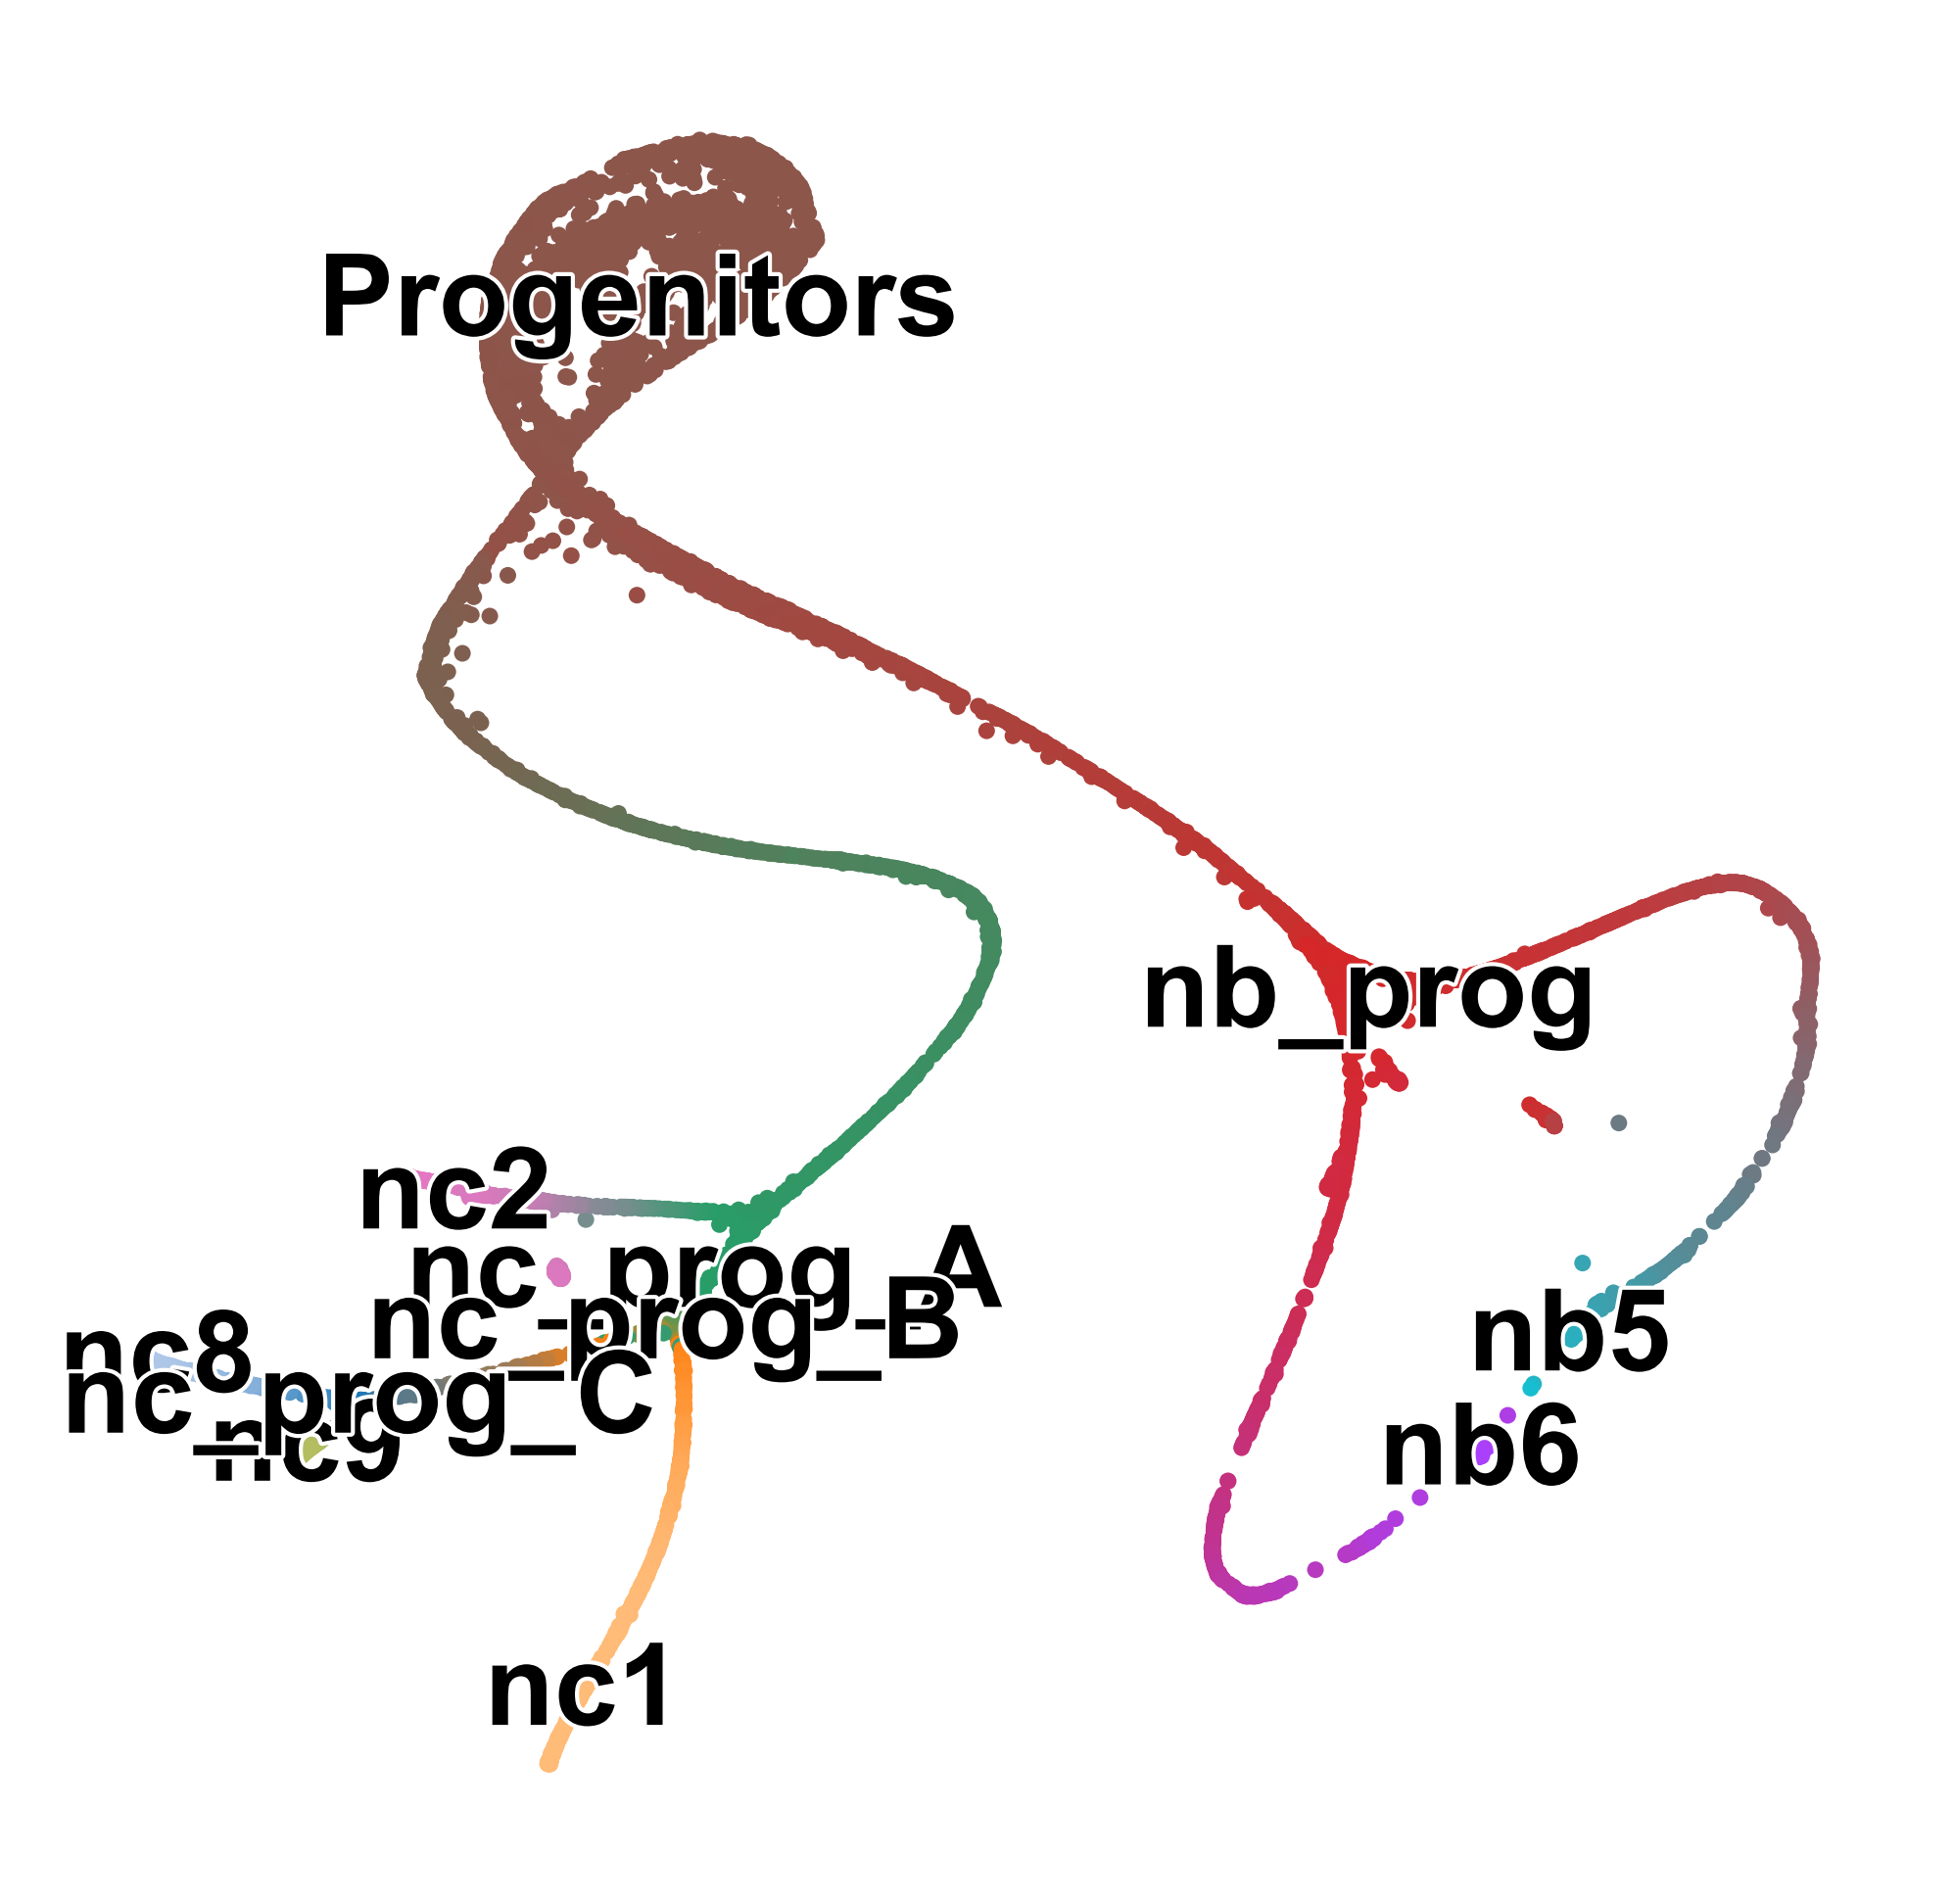

In [2]:
sc.set_figure_params(frameon=False,dpi=300)
scf.pl.milestones(adata,annotate=True,title="",save="overview.pdf")

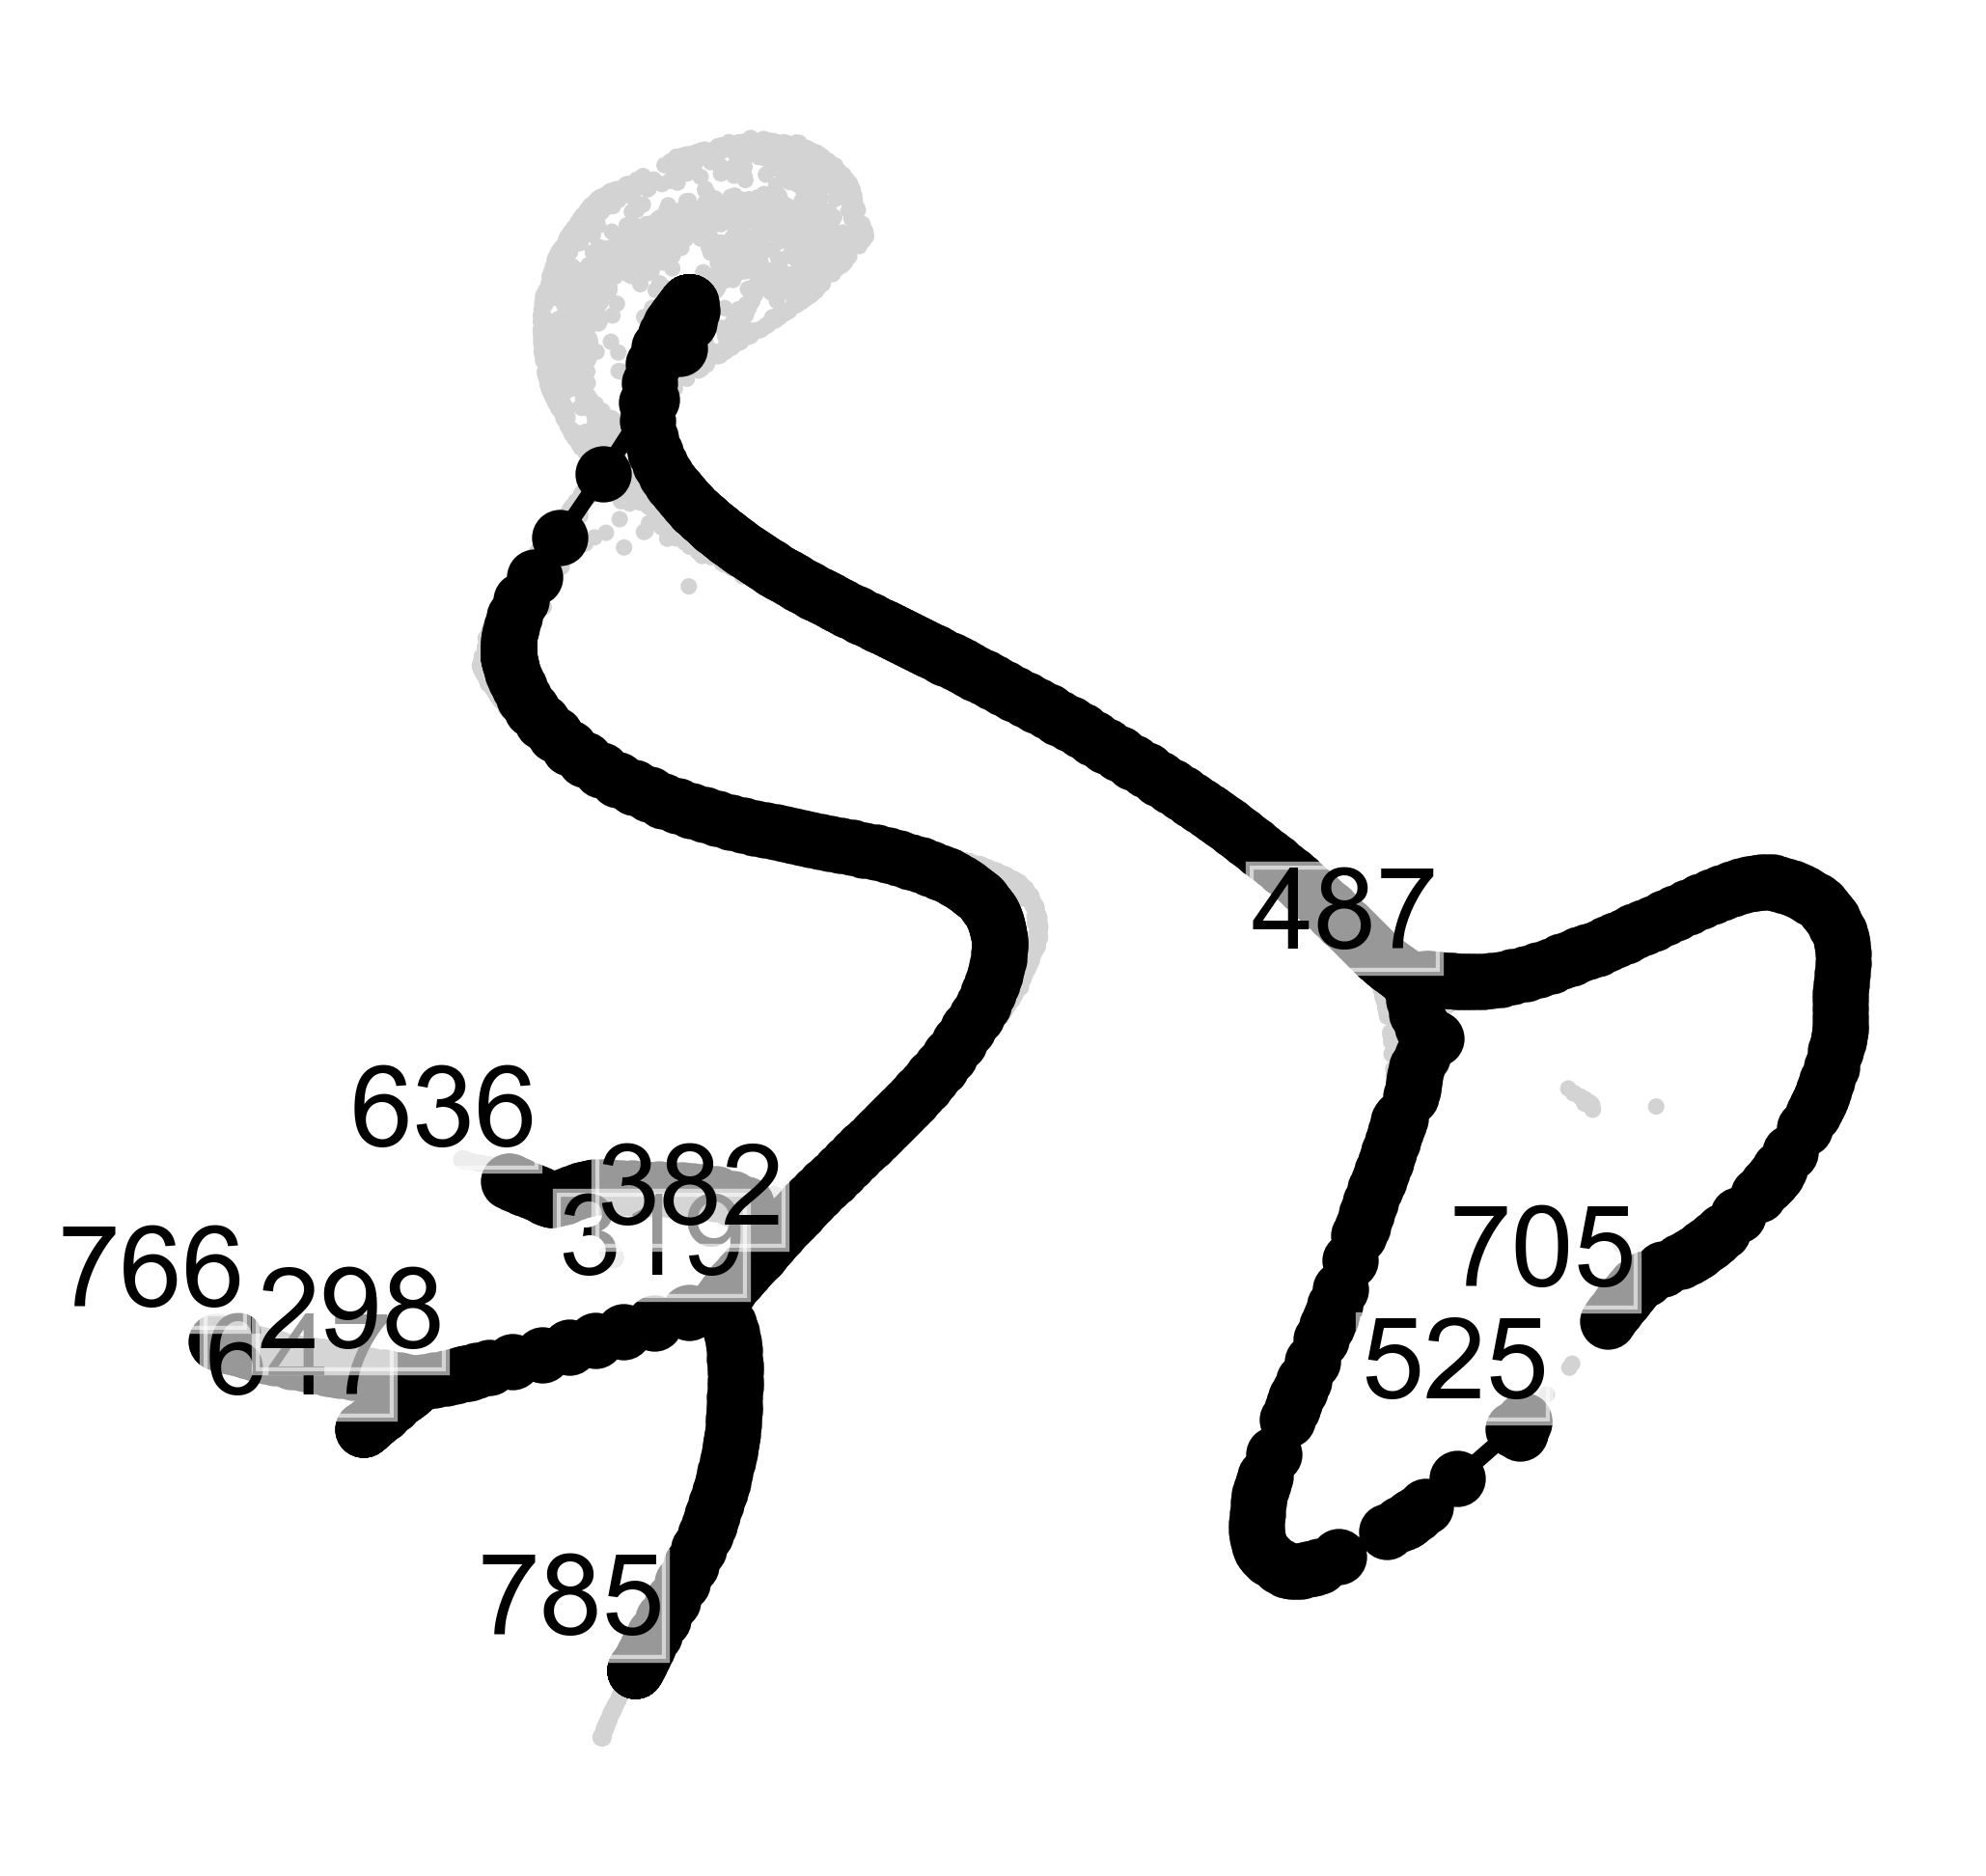

In [3]:
scf.pl.graph(adata)

In [4]:
import numpy as np
proj = (np.dot(adata.obsm["X_draw_graph_fa"].T, adata.obsm["X_R"]) / adata.obsm["X_R"].sum(axis=0)).T

In [7]:
root="Progenitors"
miles=["nb5","nb6"]

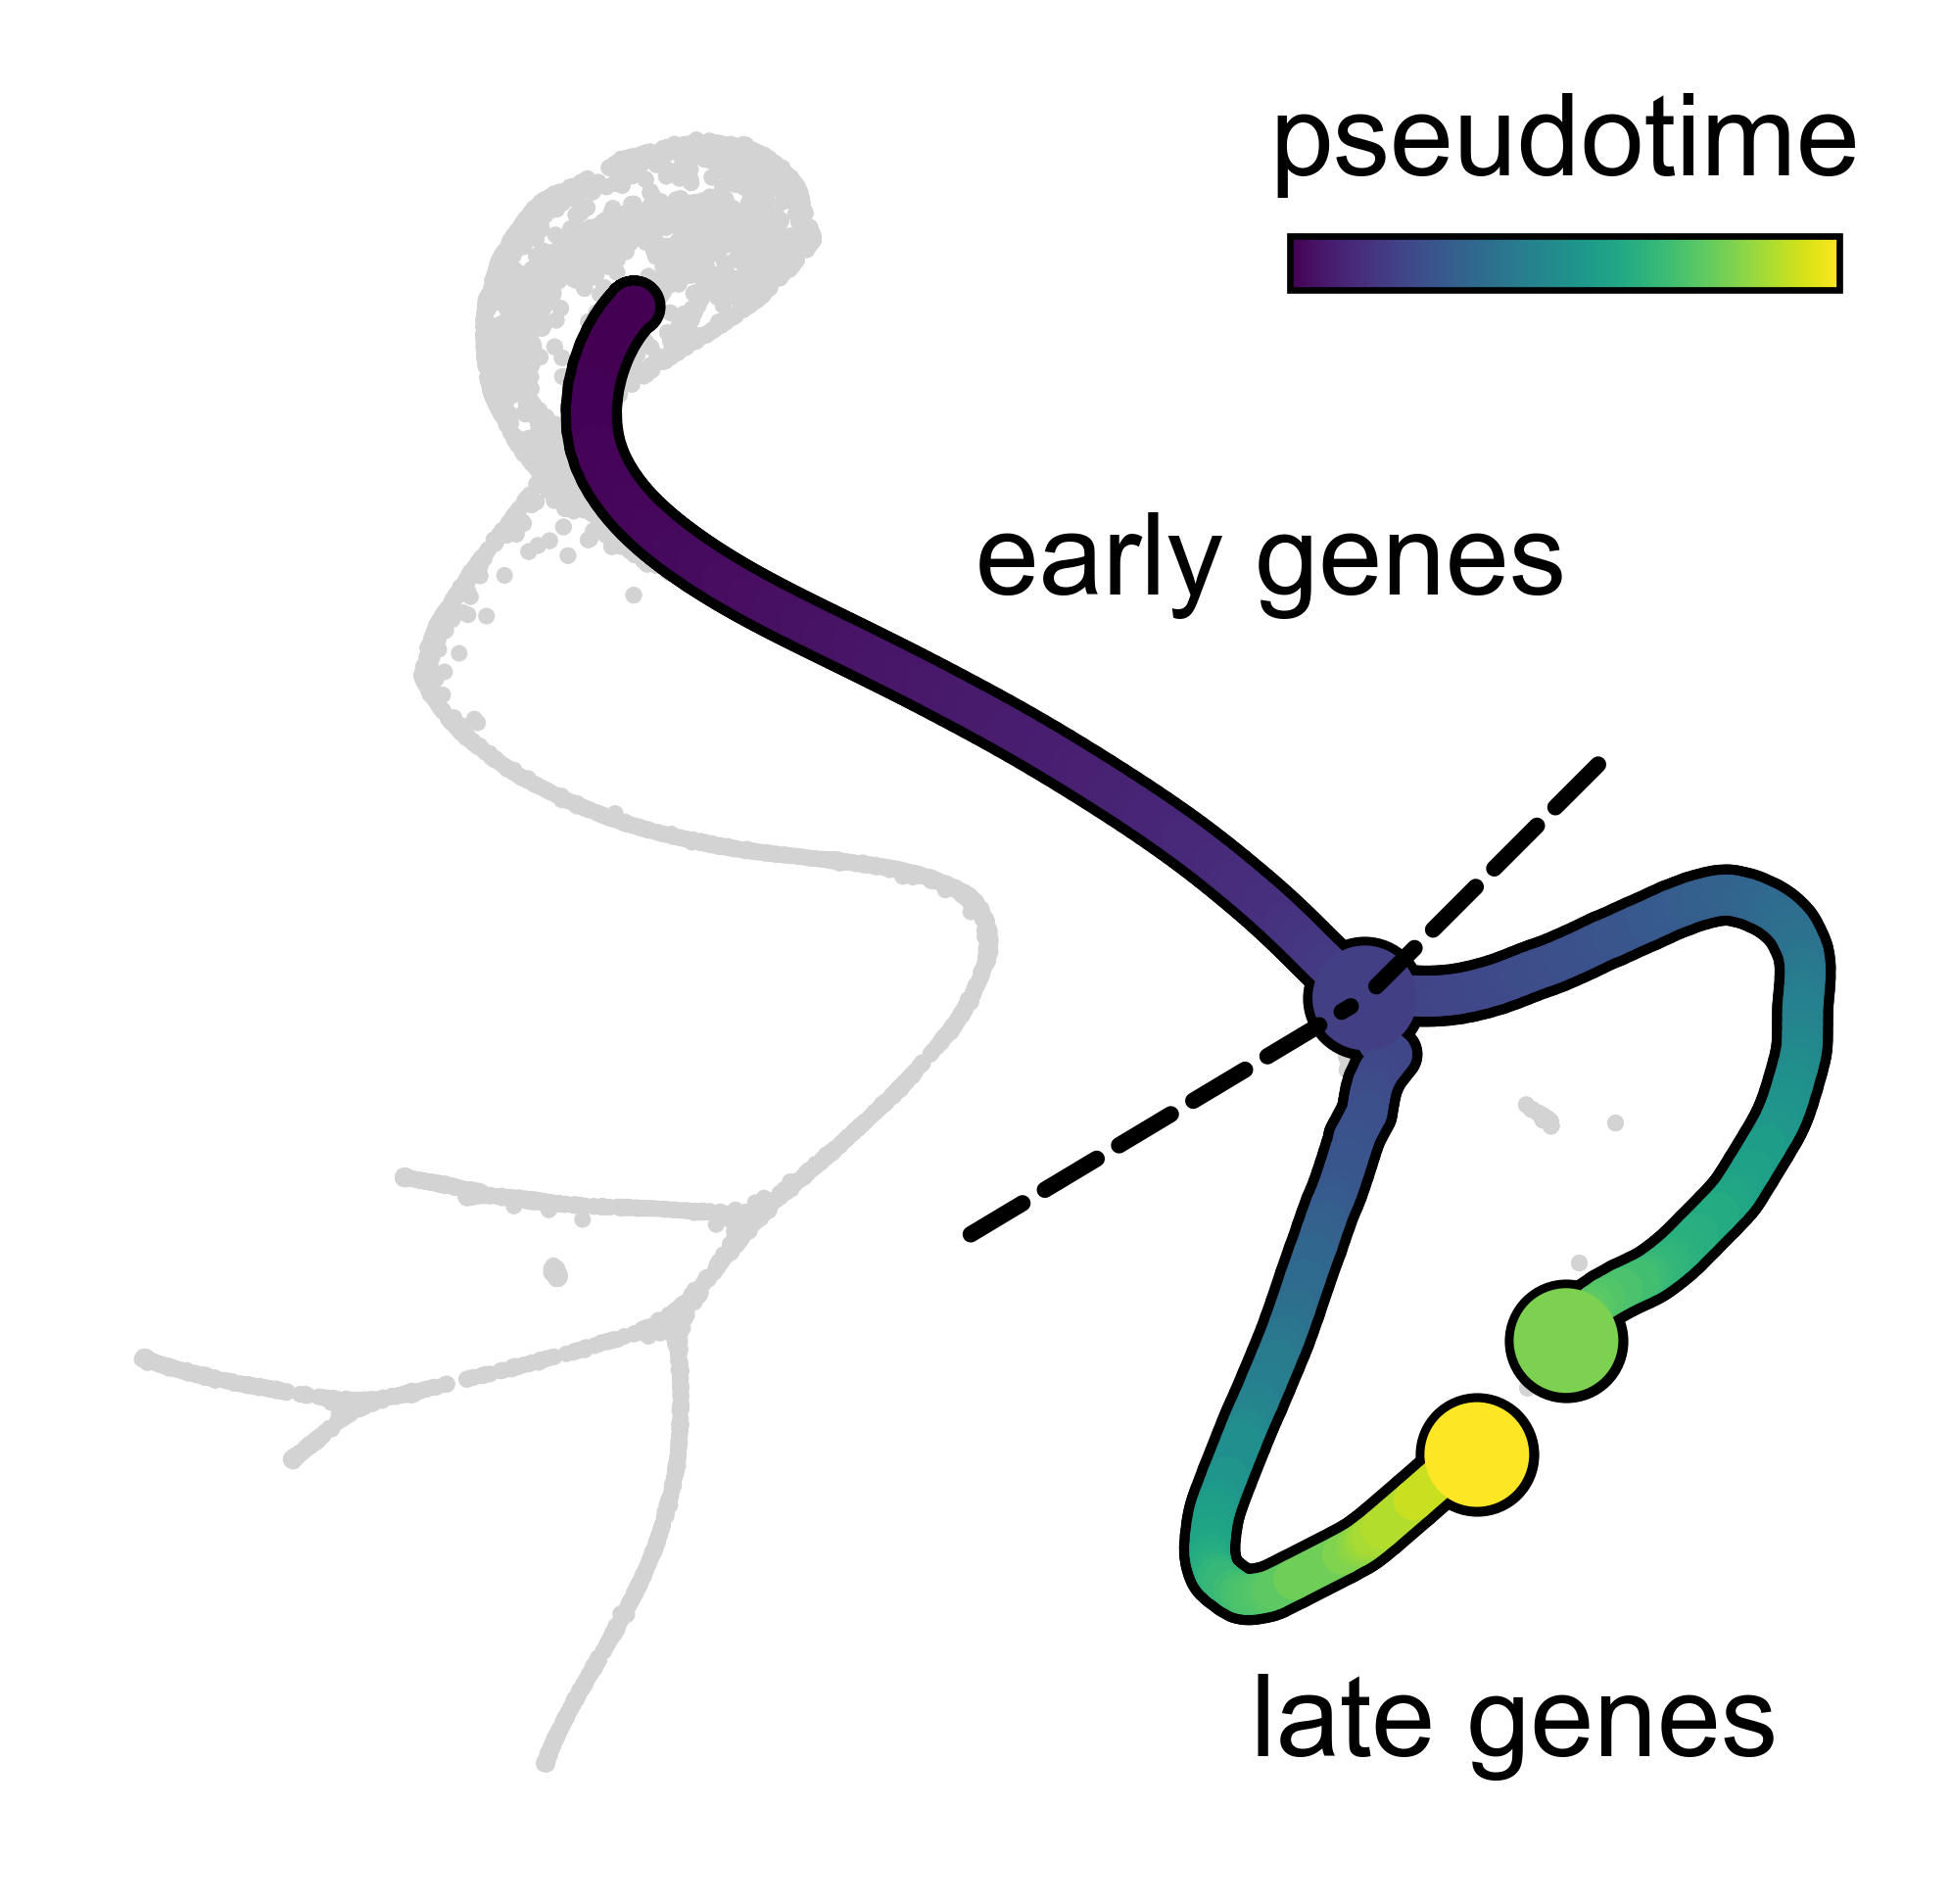

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
sc.set_figure_params(dpi=300,frameon=False)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax=scf.pl.trajectory(adata,root_milestone=root,milestones=miles,frameon=False,show=False)
cbaxes = inset_axes(ax, width="30%", height="3%",bbox_to_anchor=(0, -0.07, 1, 1),
                      bbox_transform=ax.transAxes) 

cb1 = matplotlib.colorbar.ColorbarBase(cbaxes, cmap=cm.viridis,
                                orientation='horizontal'  ,ticklocation="top",                    
                                ticks=[],label="pseudotime",
                                )
ax.annotate("",xy=proj[487,:],xytext=(-50, -30),ha="center",va="center",
             textcoords='offset points',arrowprops={"arrowstyle":"-","linestyle":"--","linewidth":2},
            zorder=10000)

ax.annotate("",xy=proj[487,:],xytext=(30, 30),ha="center",va="center",
             textcoords='offset points',arrowprops={"arrowstyle":"-","linestyle":"--","linewidth":2},
            zorder=10000)

ax.annotate("early genes",xy=(0.5,0.7),xycoords="axes fraction",zorder=10000,size=14)
ax.annotate("late genes",xy=(0.65,0.05),xycoords="axes fraction",zorder=10000,size=14)

plt.savefig("figures/early_pseudotime.pdf")

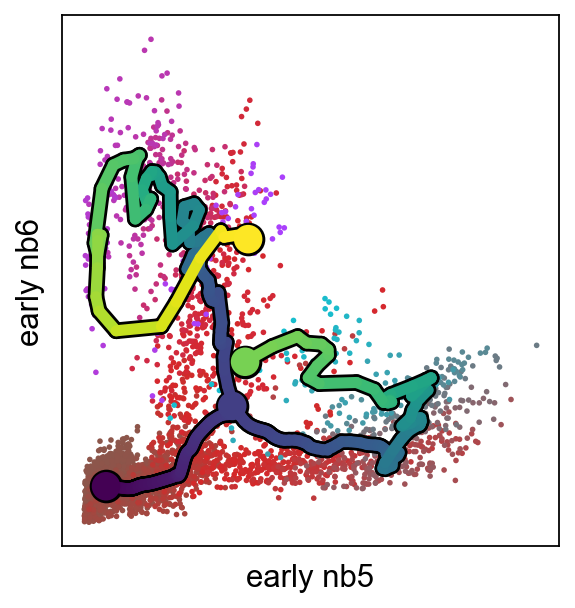

In [24]:
sc.set_figure_params()
scf.pl.modules(adata,root,miles,show_traj=True,smooth=True,module="early",save="early.pdf")

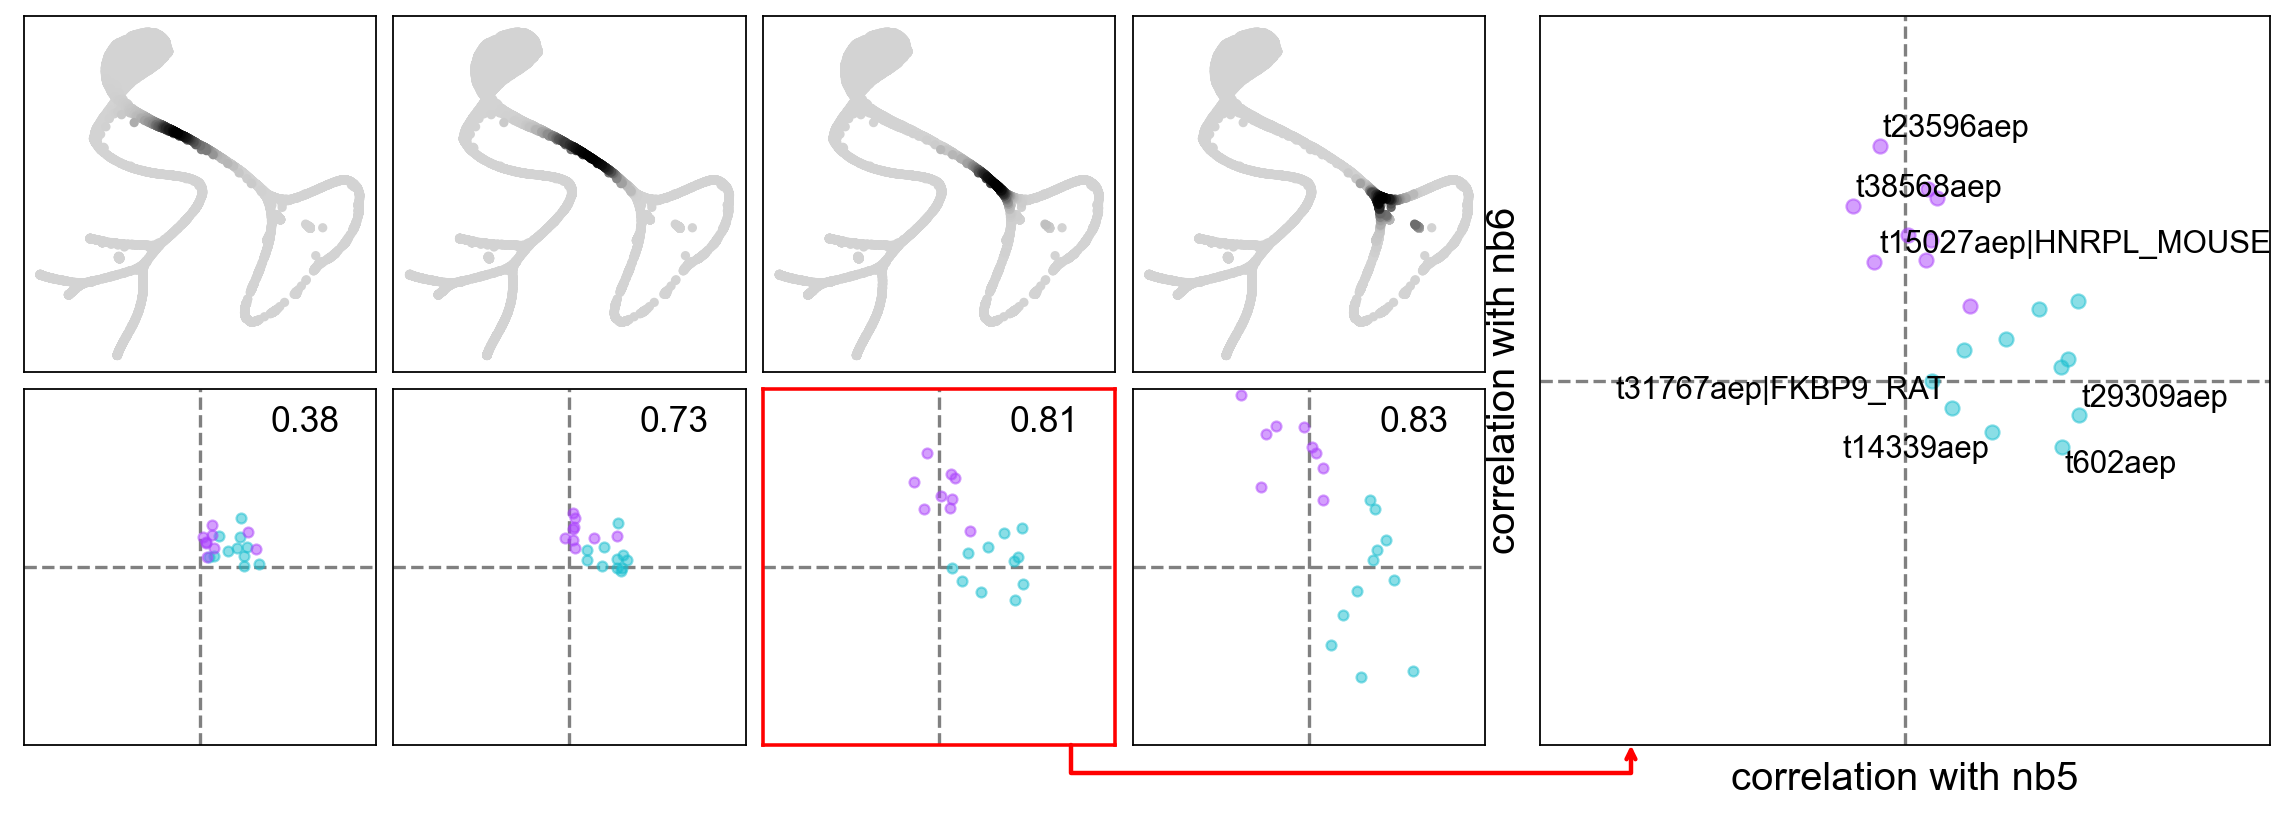

In [23]:
scf.pl.slide_cors(adata,root,miles,basis="draw_graph_fa",win_keep=range(13,17),focus=2,save=".pdf")

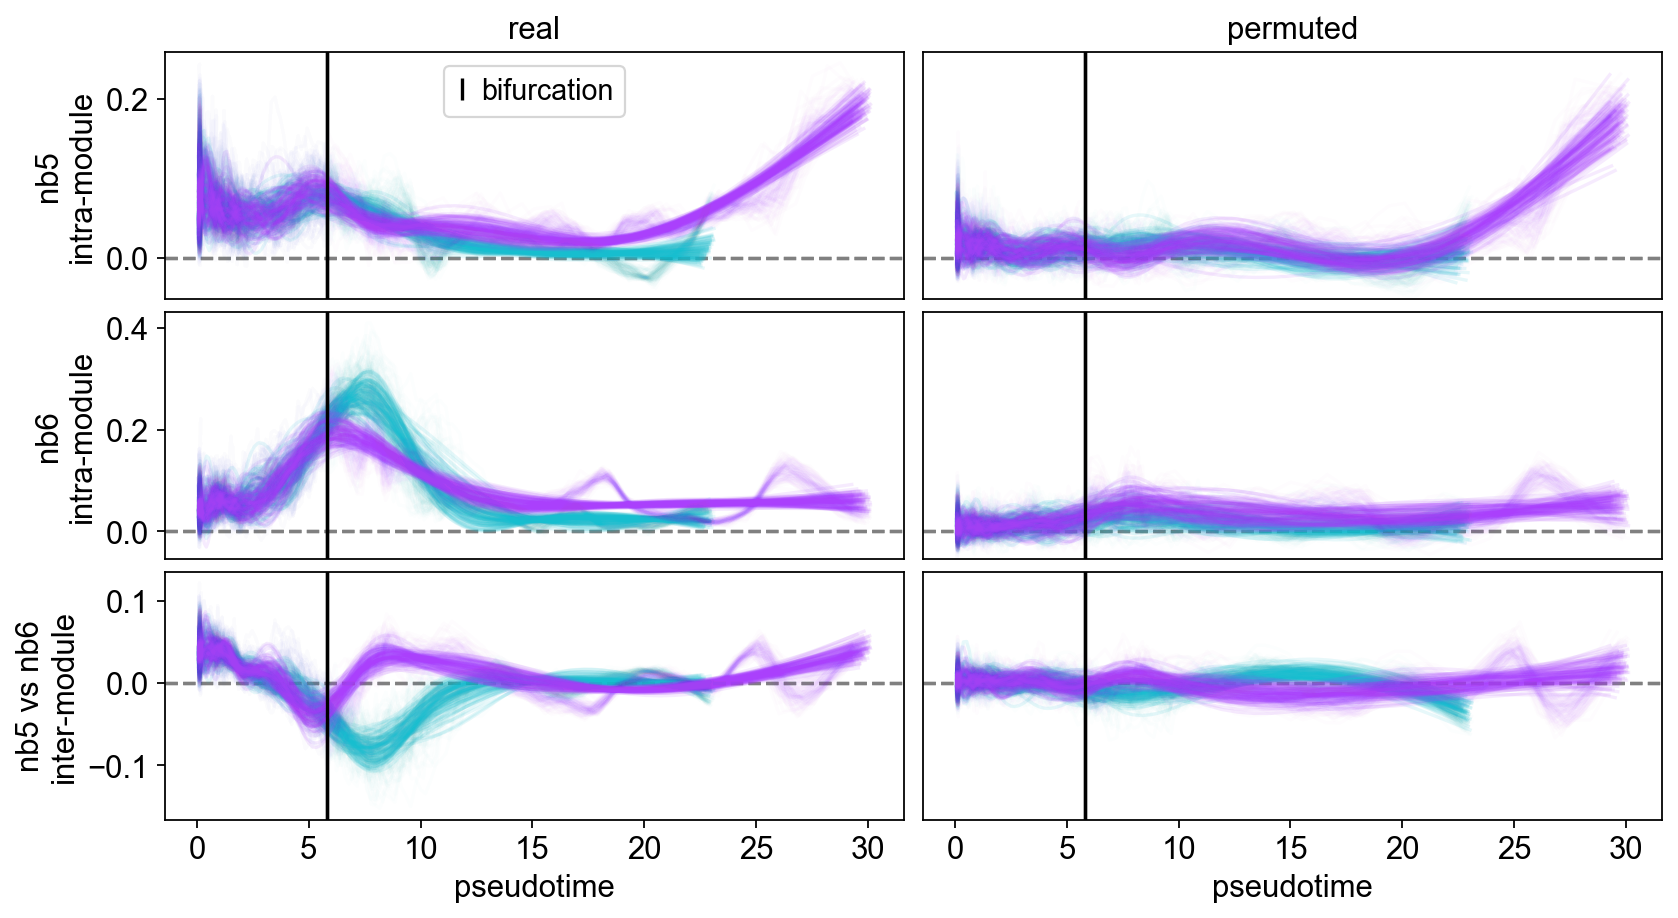

In [27]:
scf.pl.synchro_path(adata,root,miles,save="sync.pdf",knots=20)

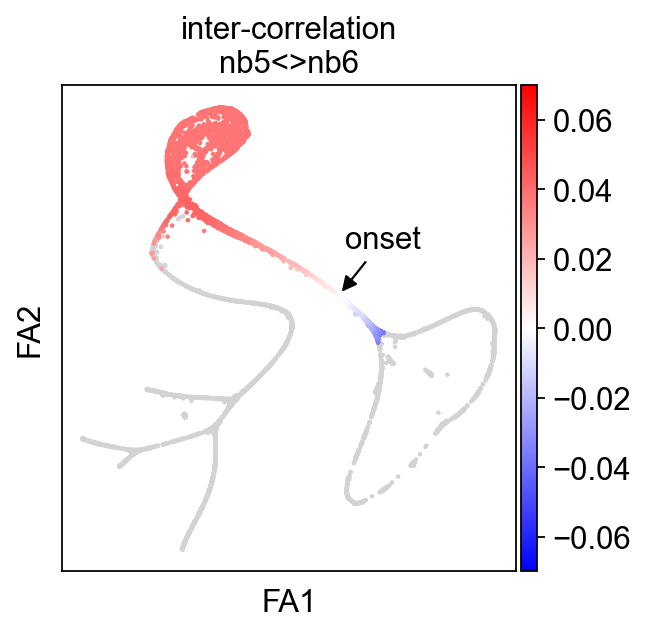

In [36]:
ax=sc.pl.draw_graph(adata,color=f"inter_cor {root}->{miles[0]}<>{miles[1]}",cmap="bwr",show=False,
                 title=f"inter-correlation\n{miles[0]}<>{miles[1]}",vmax=0.07,vmin=-0.07)

bol=adata.obs[f"inter_cor {root}->{miles[0]}<>{miles[1]}"][adata.obs.t.sort_values().index]<0
t=adata.obs.t.sort_values()[np.argwhere(bol.values)[0][0]]
cell_annot=adata.obs.t.sort_values().index[np.argwhere(bol.values)[0][0]]

ax.annotate("onset",xy=(adata[cell_annot].obsm["X_draw_graph_fa"][:,0],
                      adata[cell_annot].obsm["X_draw_graph_fa"][:,1]),va="center",ha="center",
            xytext=(20, 25), textcoords='offset points',arrowprops=dict(arrowstyle="-|>", color='black'))
plt.savefig("figures/draw_graph_faintercor.pdf")

In [2]:
import sys
import numpy as np
fname="fig"
path="/".join(np.array(sys.executable.split("/"))[:-1])

In [9]:
%%bash -s $fname $path
cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=240mm,paperwidth=210mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphbox,graphicx} 
\usepackage{adjustbox}

\begin{document}
\setmainfont{Arial}

\noindent
\normalsize 

\fontsize{13pt}{13pt}\selectfont

\raggedright \begin{minipage}[t]{.32\textwidth}
\raggedright \textbf{a} \textit{Hydra} dataset

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/milestonesoverview.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.32\textwidth}
\raggedright \textbf{b} Learned trajectory

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/early_pseudotime.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.33\textwidth}
\raggedright \textbf{c} Co-activation of early modules

\vspace{1ex}

\includegraphics[width=.9\textwidth]{figures/modulesearly.pdf}
\end{minipage}\hfill

\raggedright \textbf{d} Early module correlations

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/slide_cors.pdf}

\vspace{1ex}

\raggedright \begin{minipage}[t]{.65\textwidth}
\raggedright \textbf{e} Intra/inter-module correlations

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/synchro_pathsync.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.35\textwidth}
\raggedright \textbf{f} Onset of module repulsion

\vspace{1ex}

\includegraphics[width=\textwidth]{figures/draw_graph_faintercor.pdf}
\end{minipage}\hfill



\clearpage
EOF
echo "\end{document}" >> $1.tex

$2/tectonic -c minimal $1.tex

$2/identify $1.pdf

$2/convert -flatten -density 300 $1.pdf $1.jpg

fig.pdf PDF 612x792 612x792+0+0 16-bit sRGB 3370B 0.000u 0:00.000


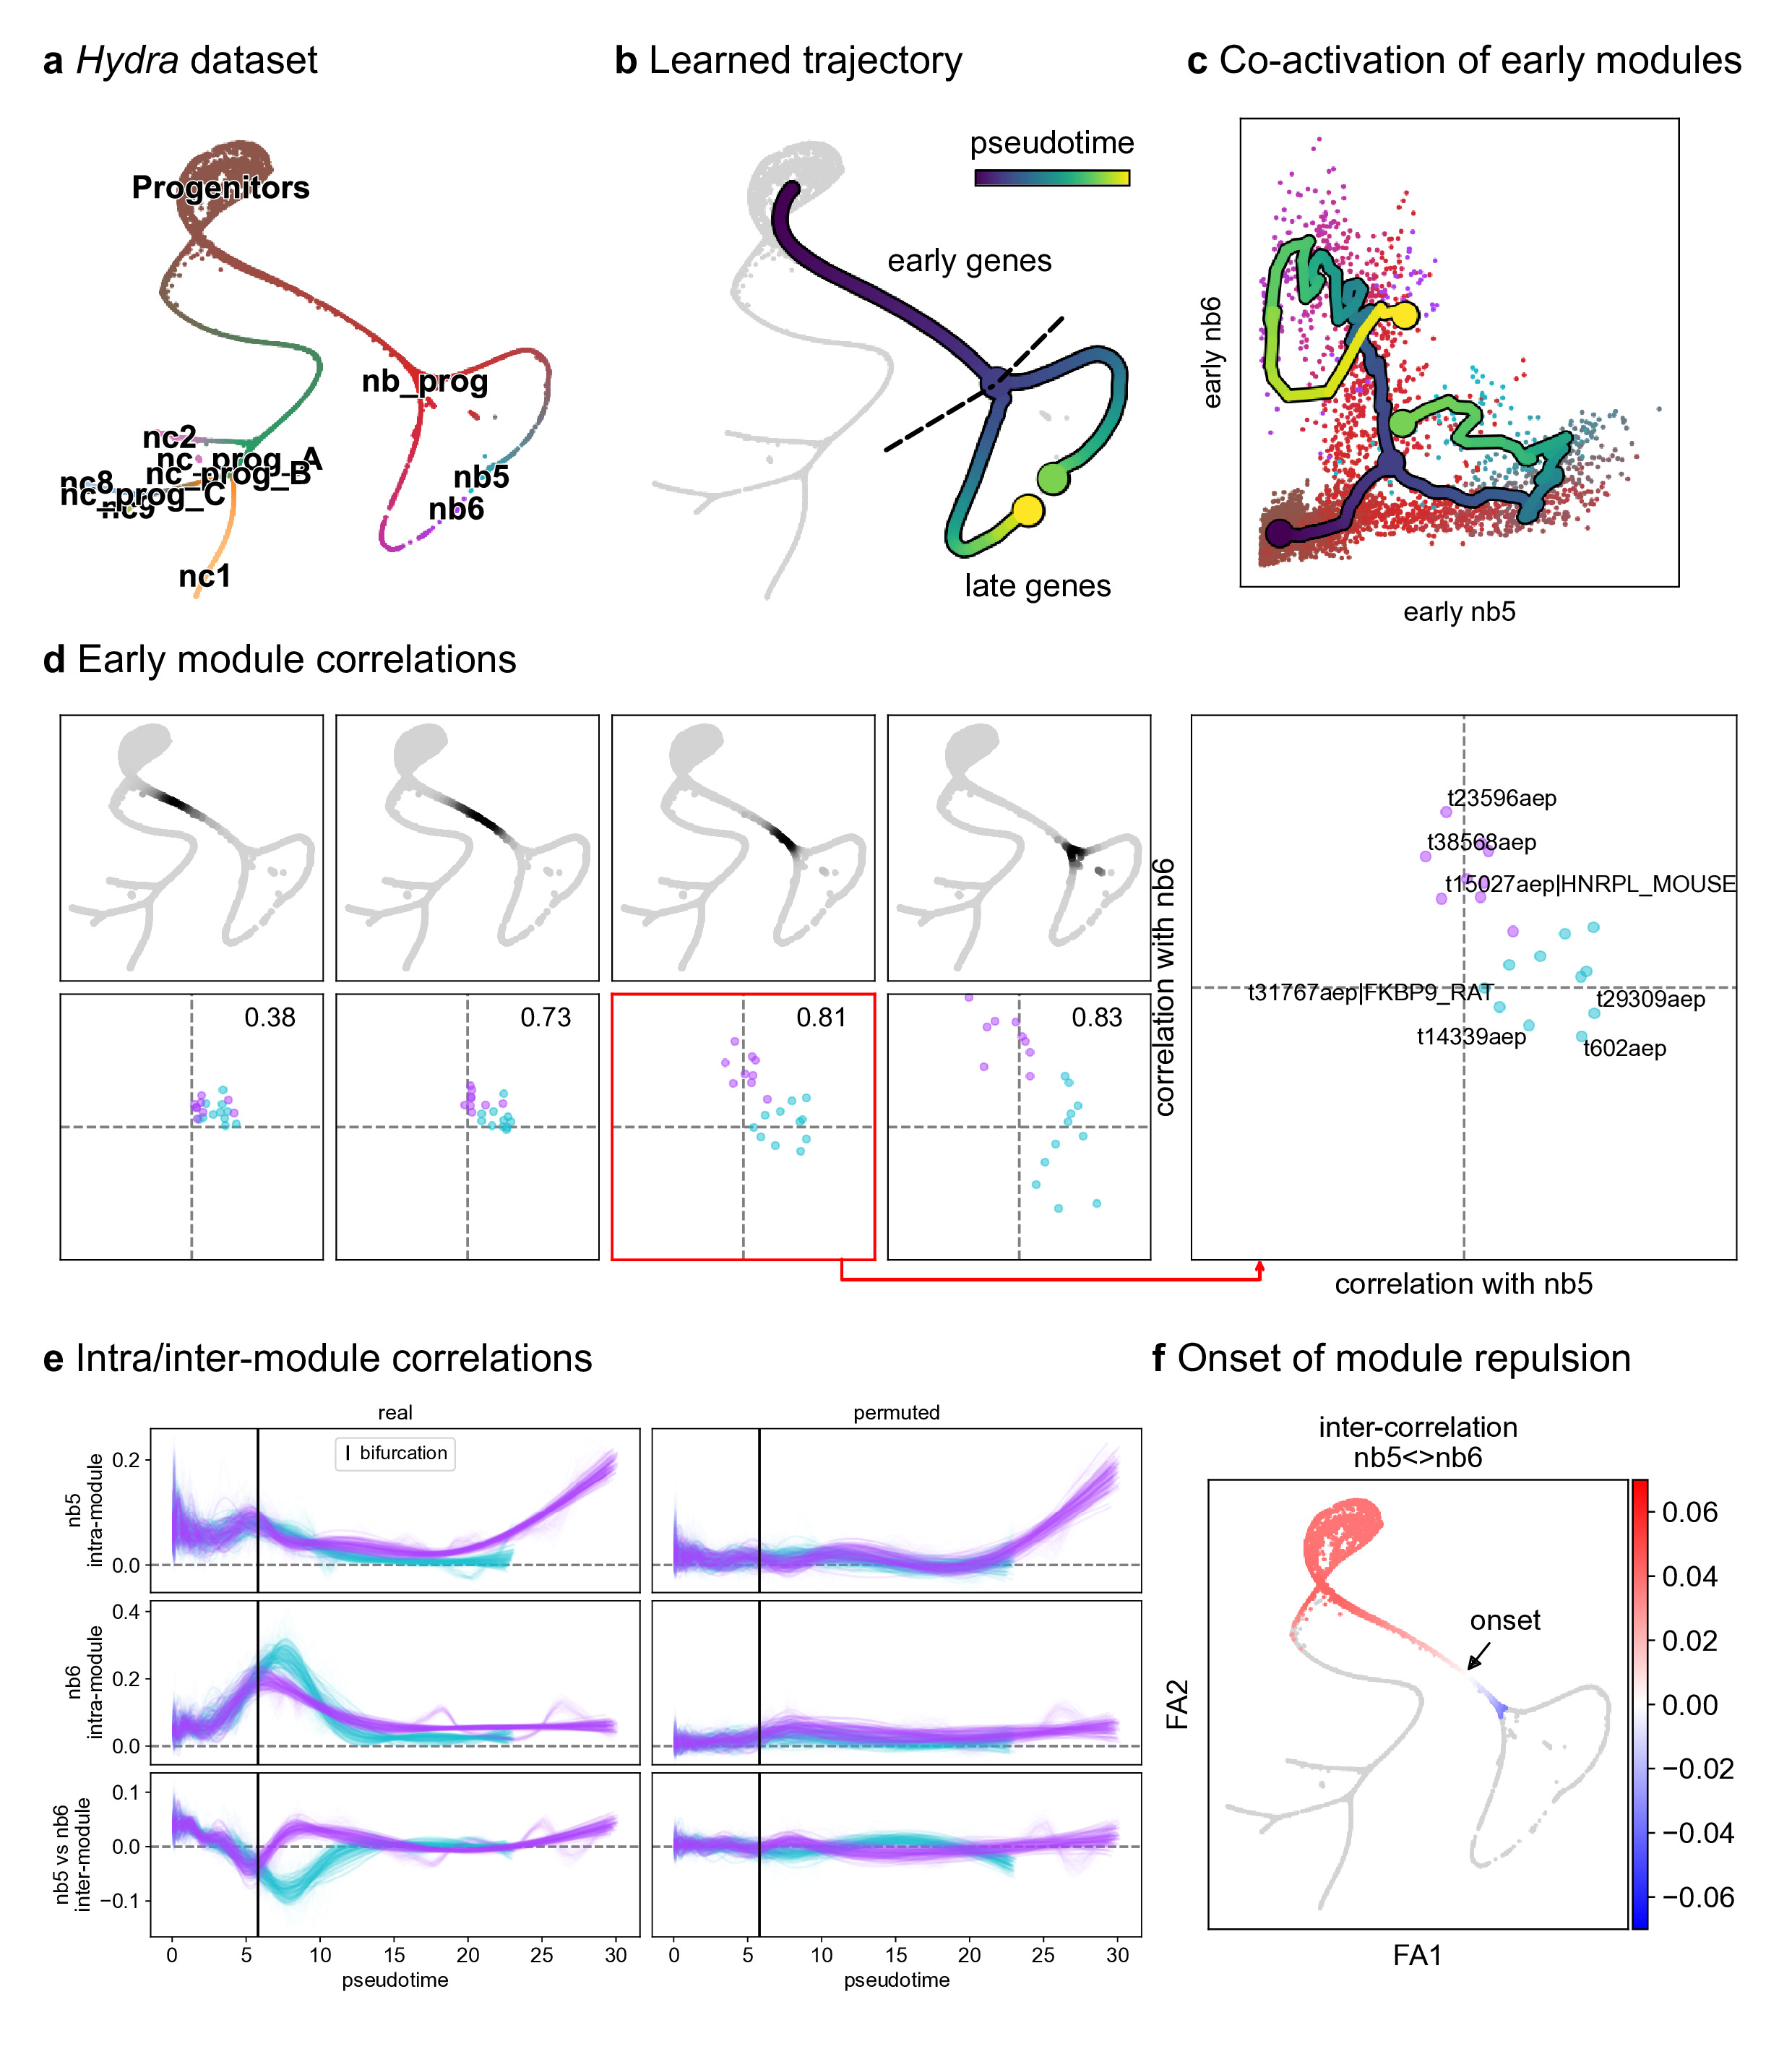

In [10]:
from IPython.display import Image
Image(filename=f'{fname}.jpg')